In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode

In [ ]:
! pip install rotation-forest scikit-learn numpy

In [ ]:
! pip install klib

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from rotation_forest import RotationForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import klib

# Data Alzheimer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ganti path sesuai folder kamu
file_path = '/content/drive/My Drive/TPM/alzheimers_disease_data.csv'

# Baca file
df = pd.read_csv(file_path)

# Tampilkan 5 data teratas
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.4543

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# hapus kolom "PatientID"
df = df.drop(columns=['PatientID'])

df.dtypes

,0
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64
SleepQuality,float64


# Eksplorasi Data

## Eksplorasi Peubah Numerik

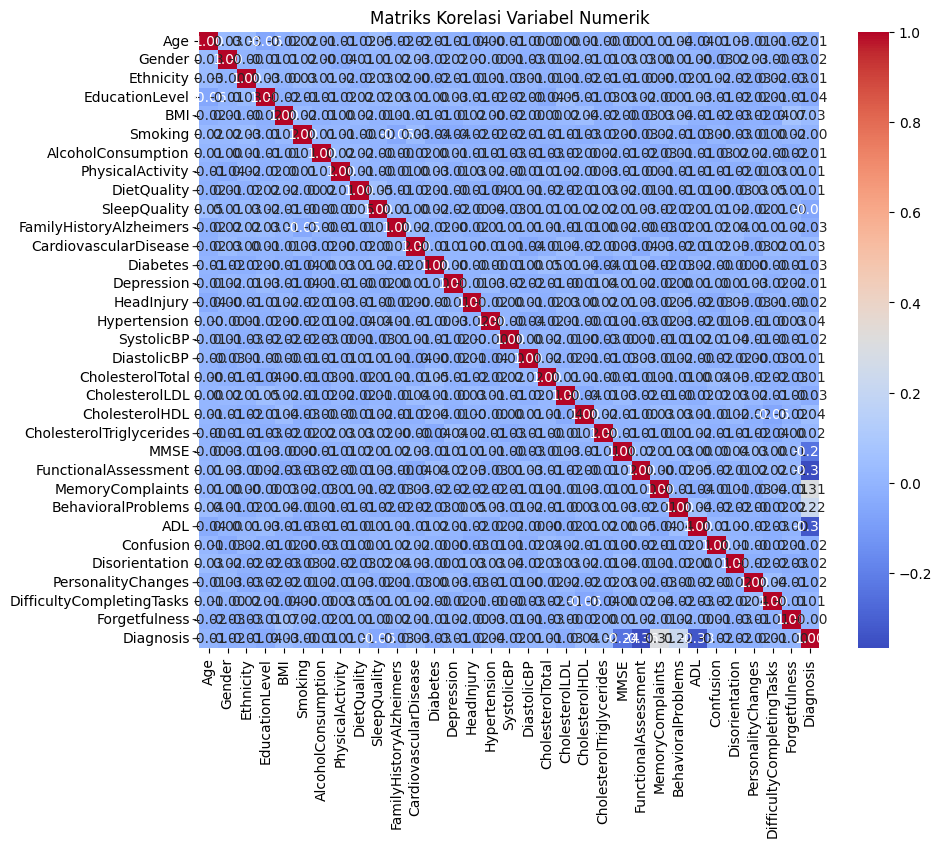

In [ ]:
df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

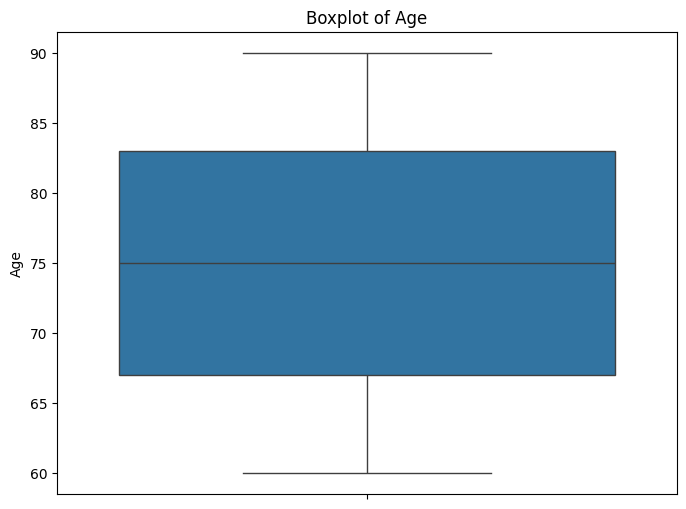

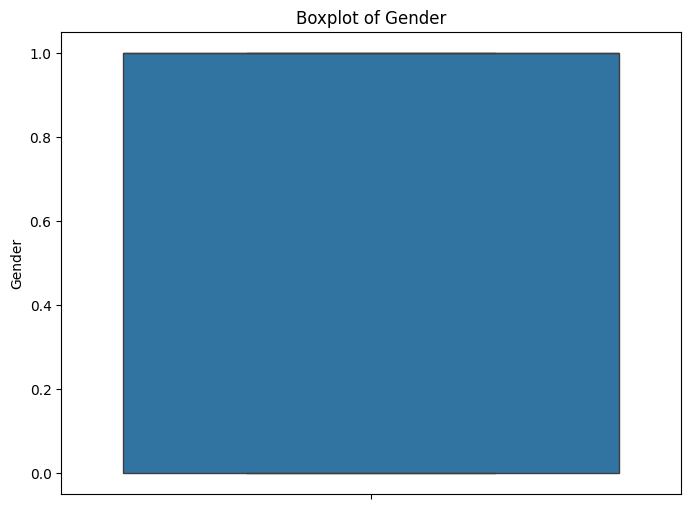

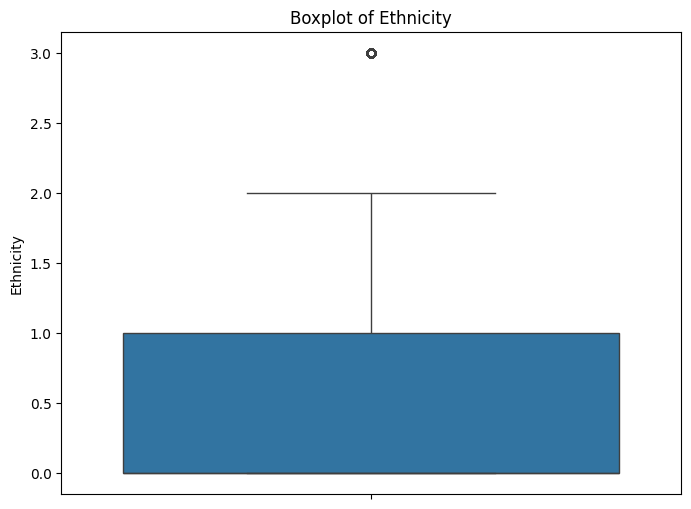

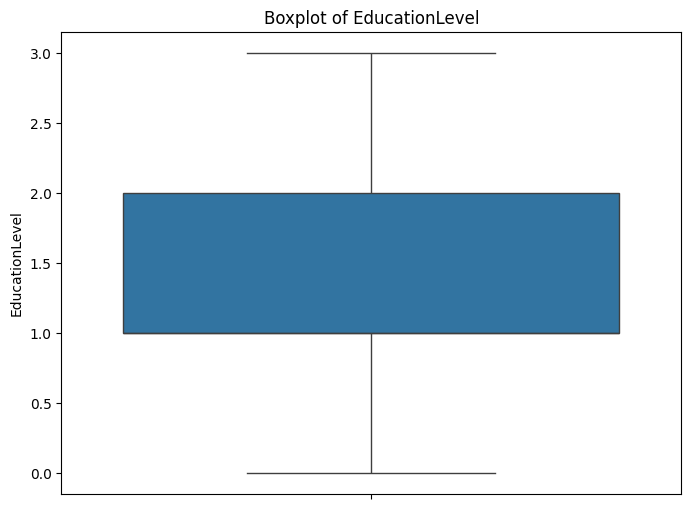

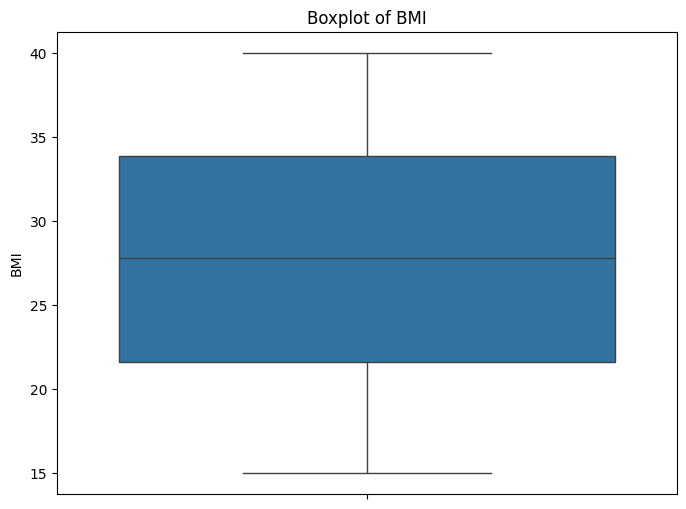

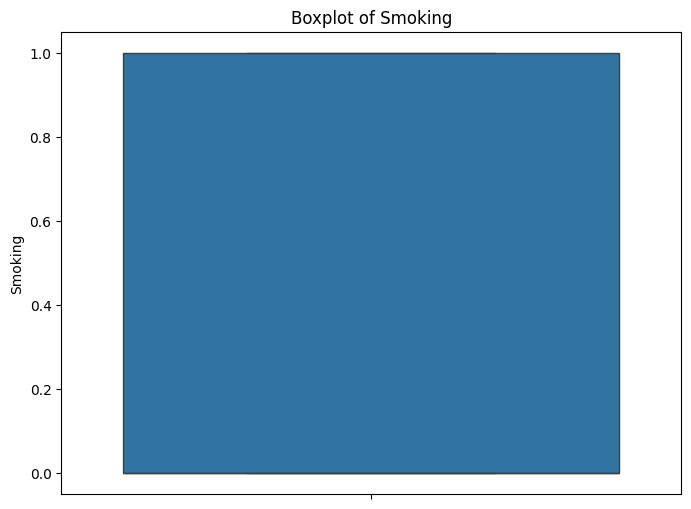

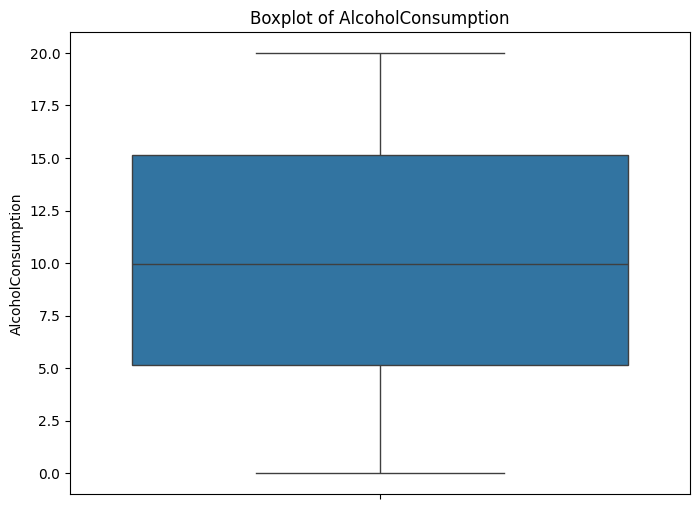

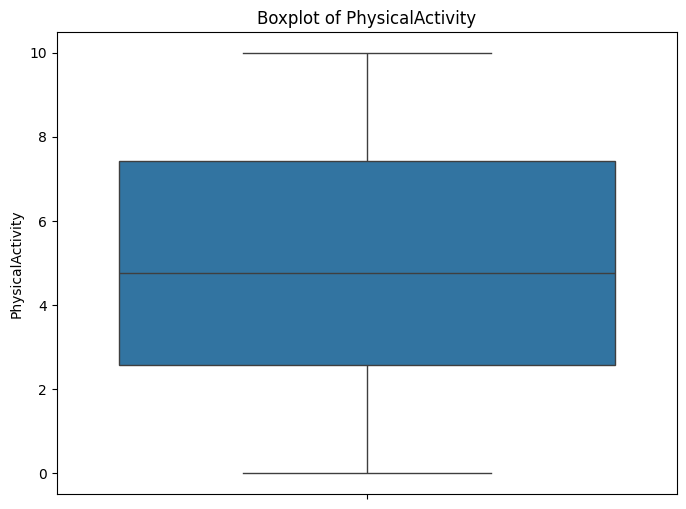

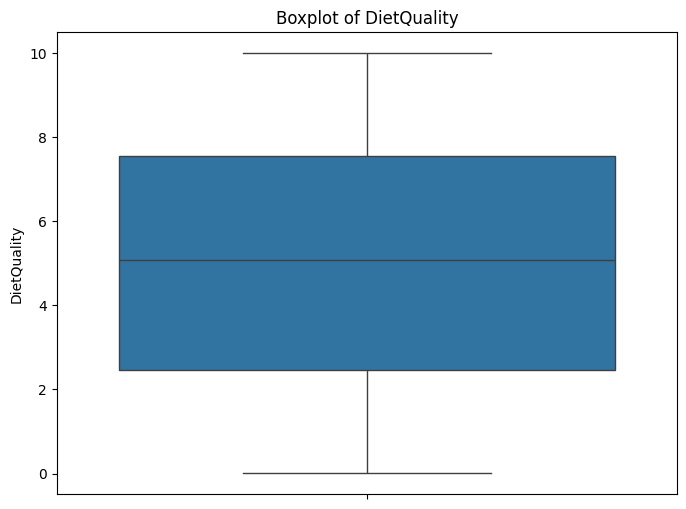

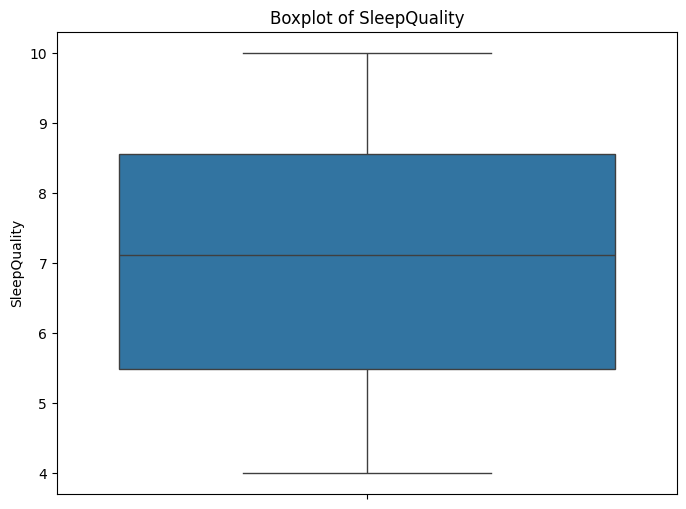

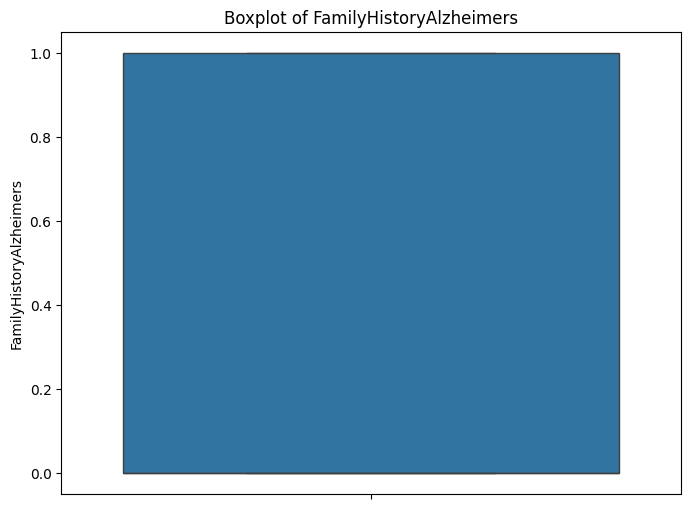

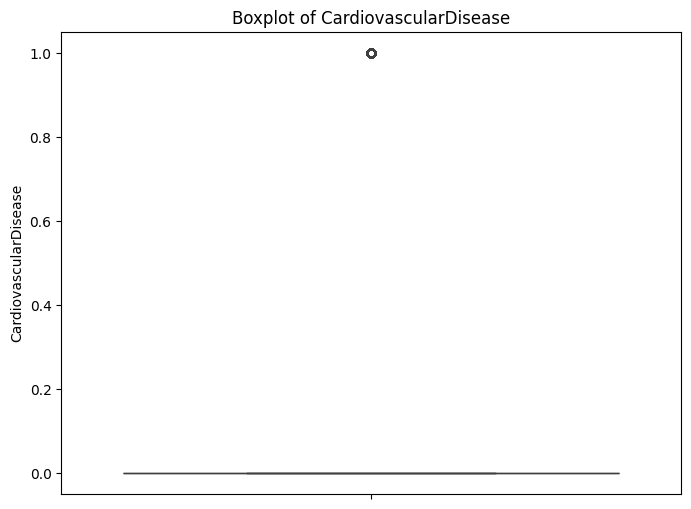

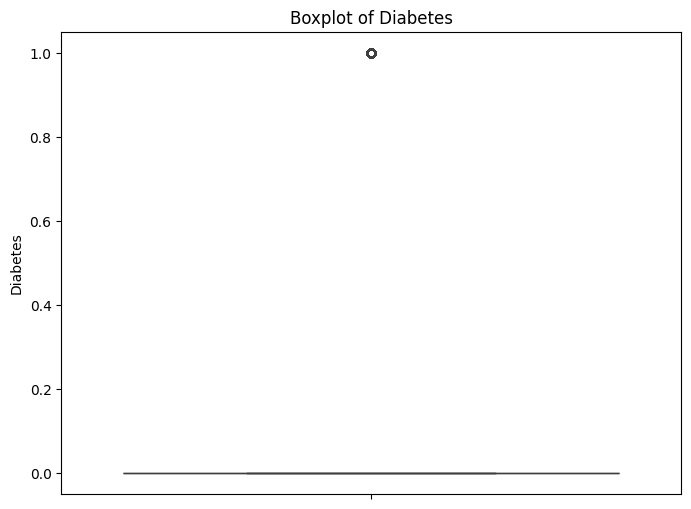

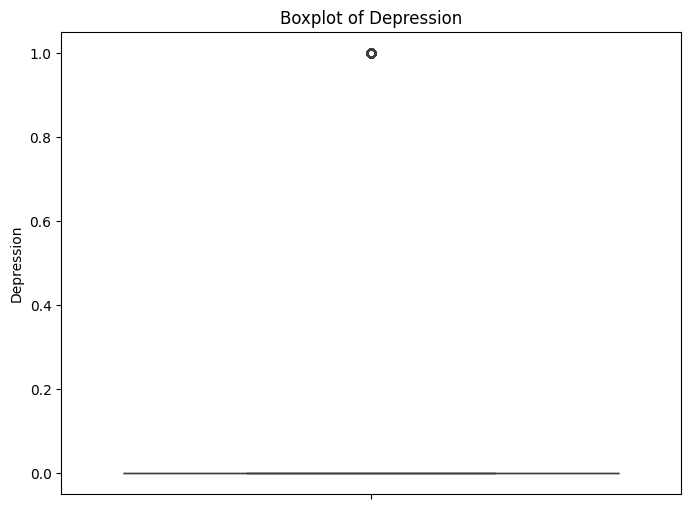

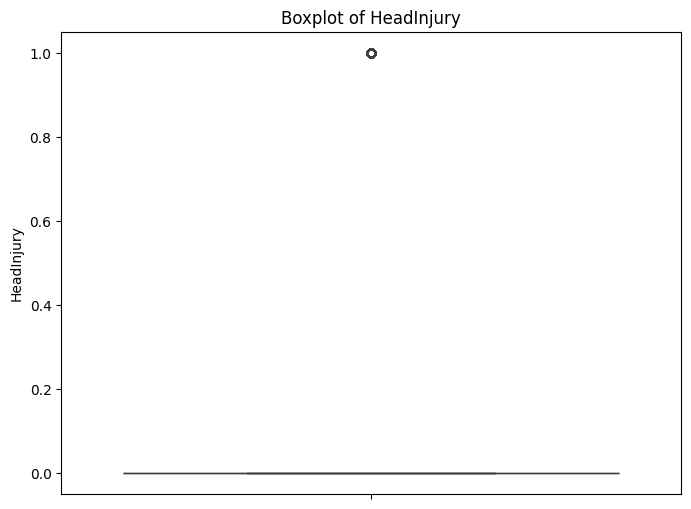

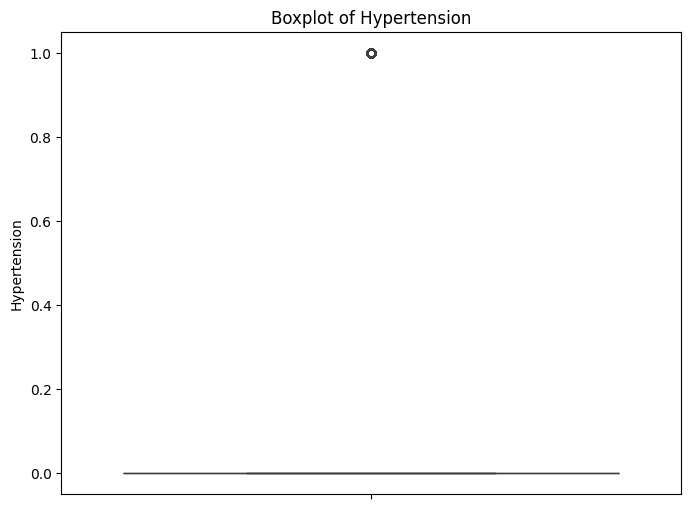

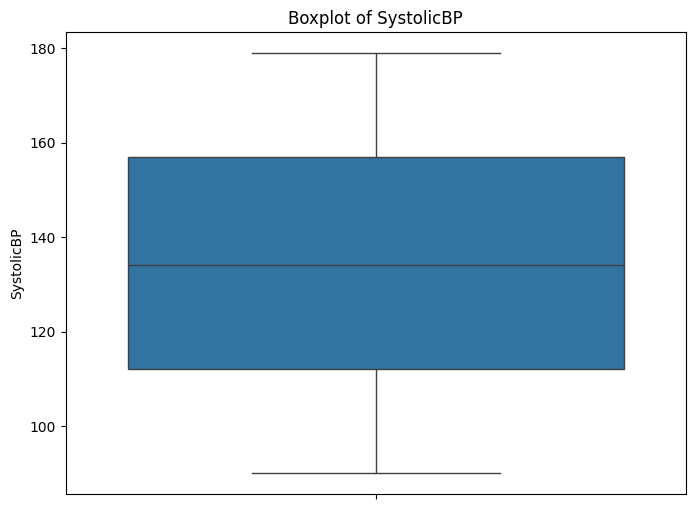

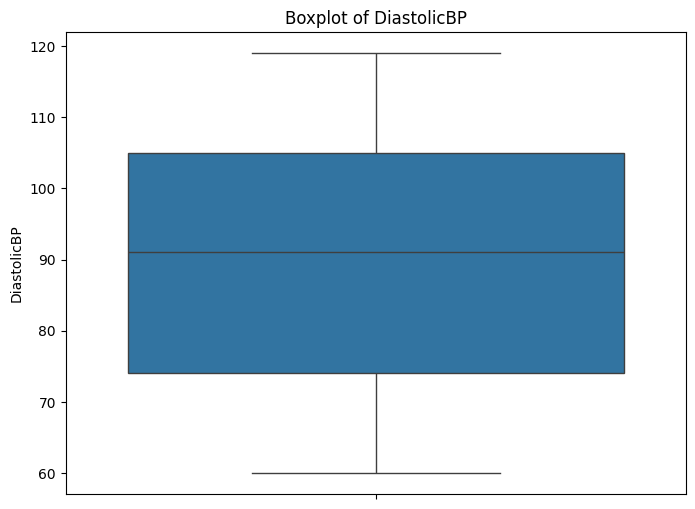

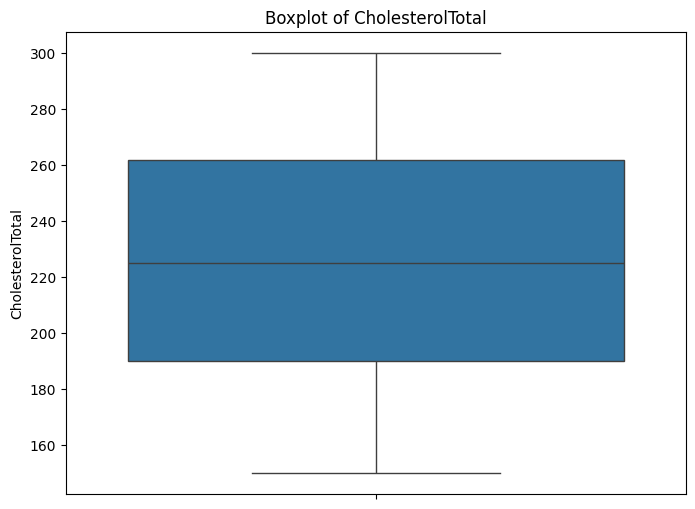

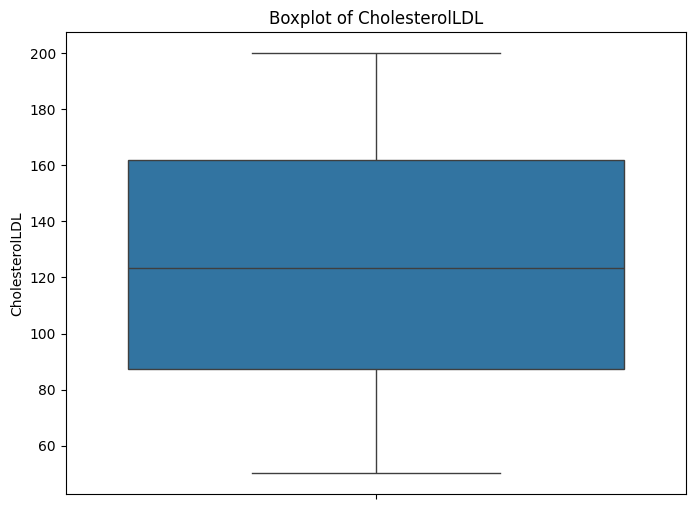

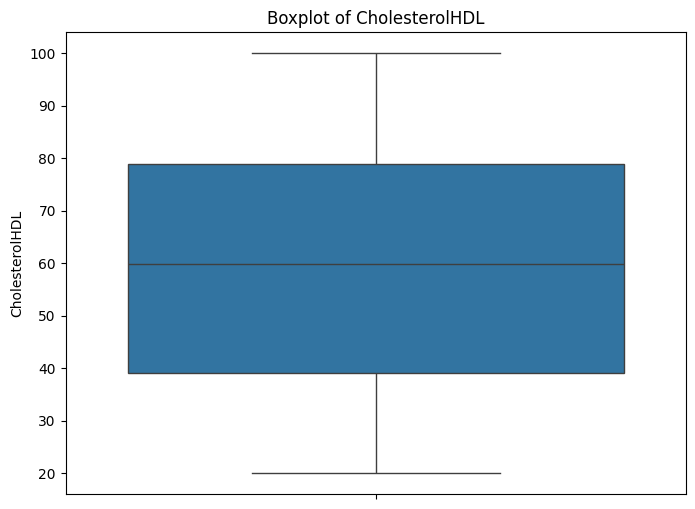

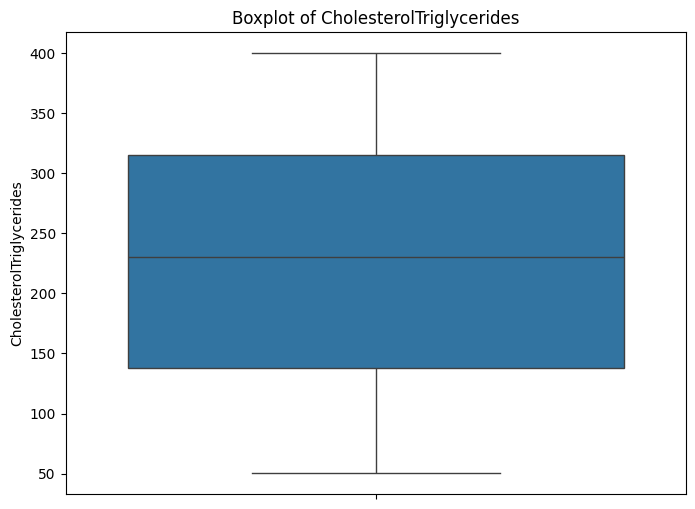

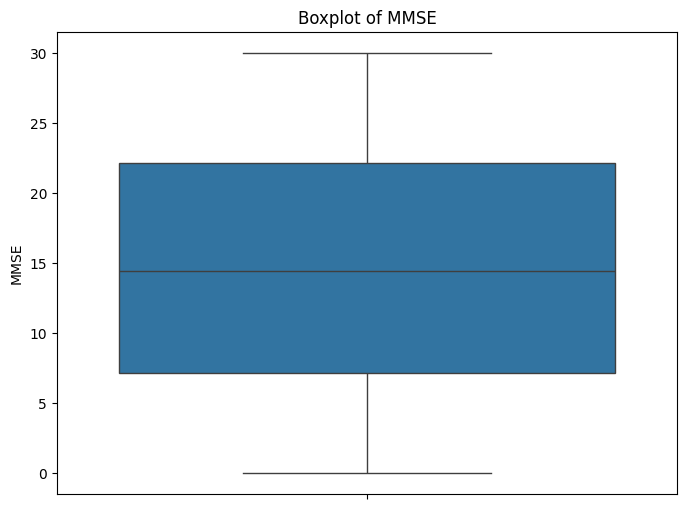

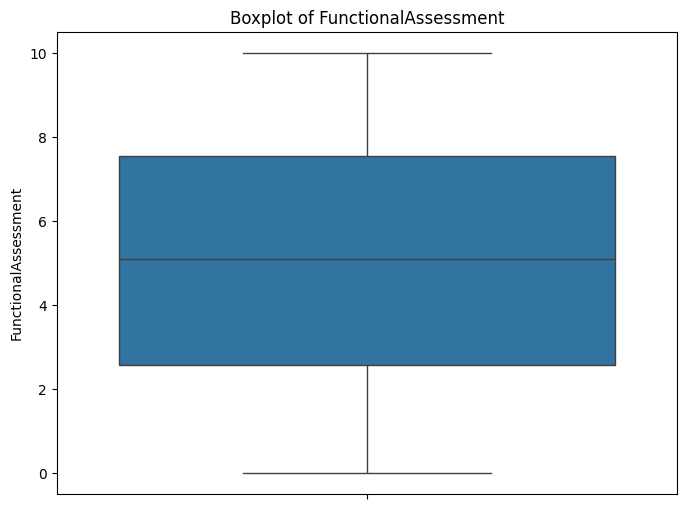

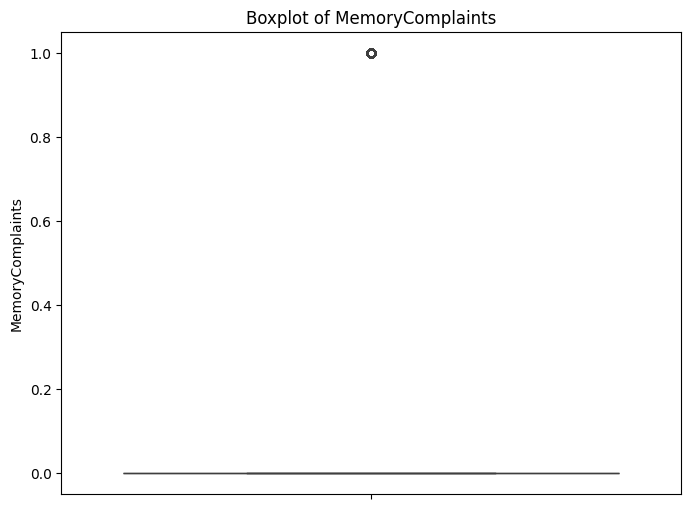

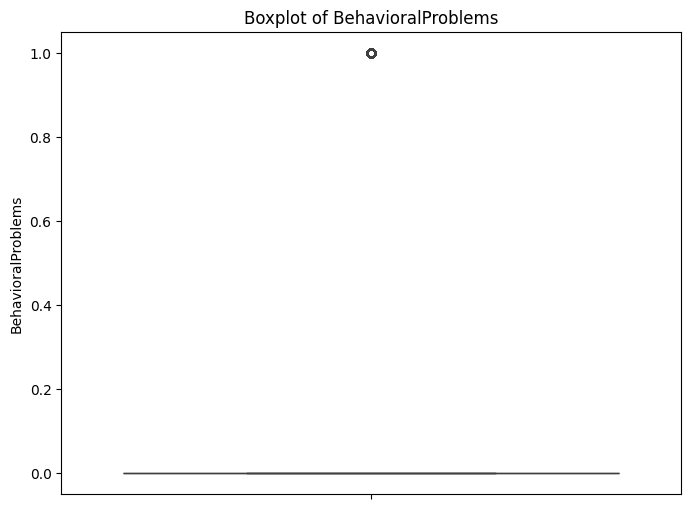

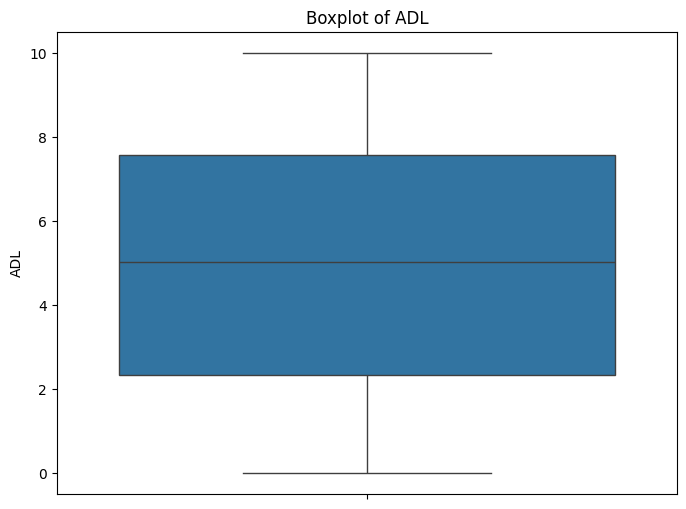

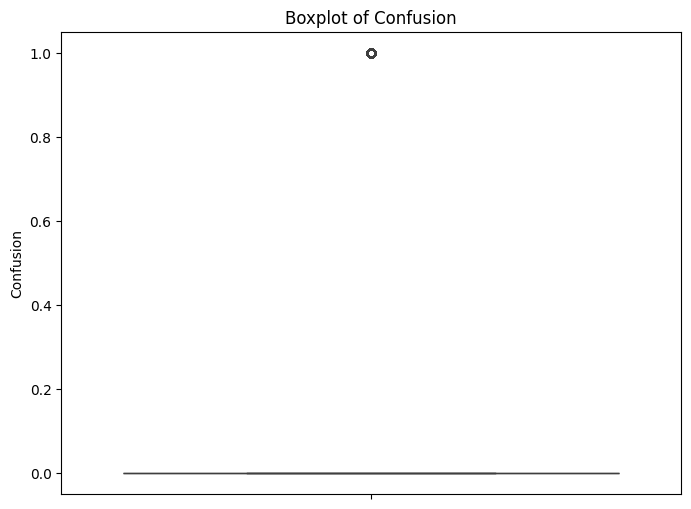

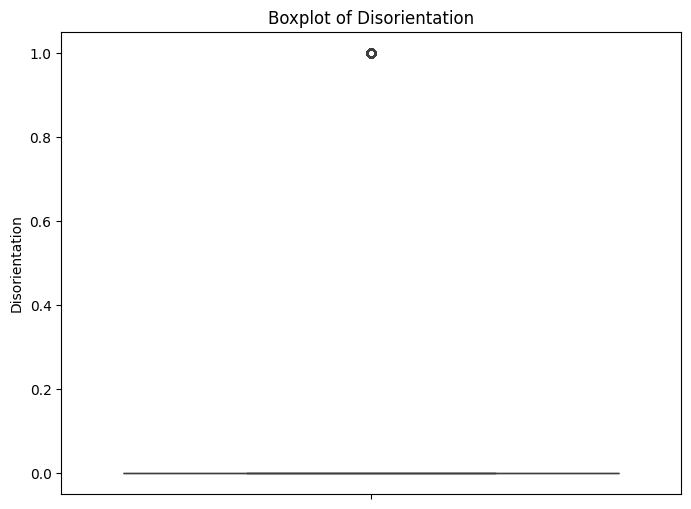

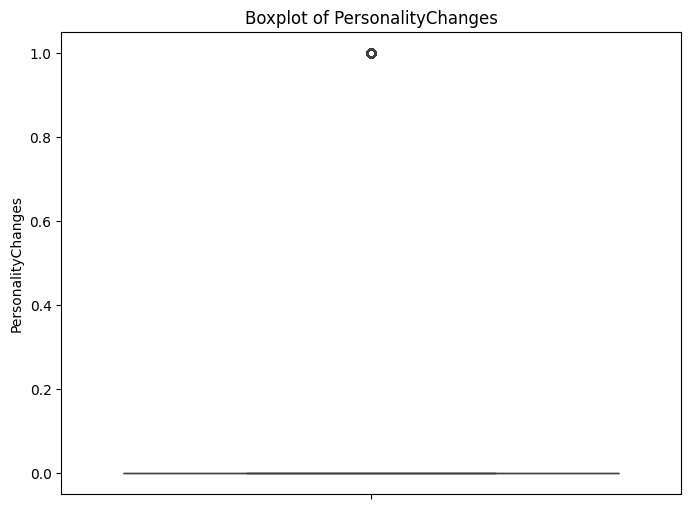

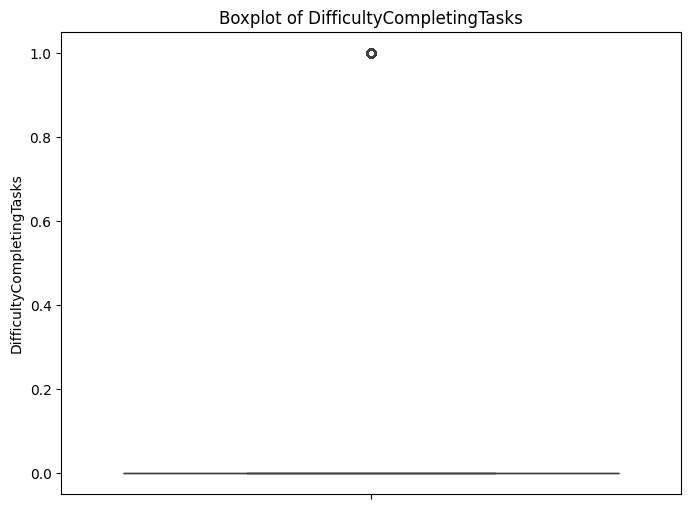

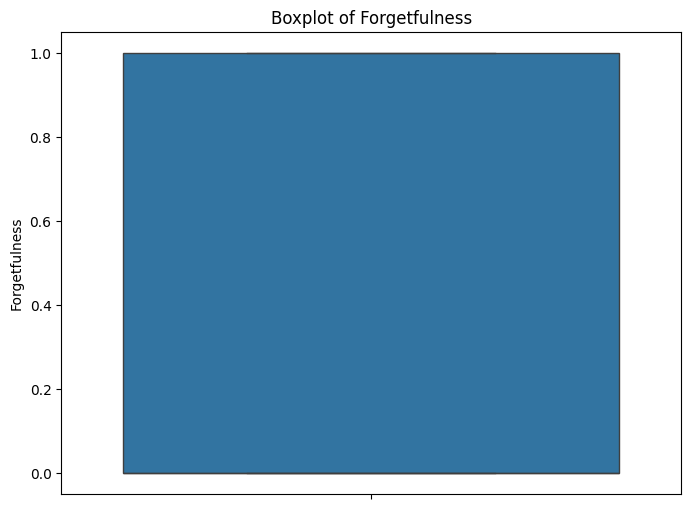

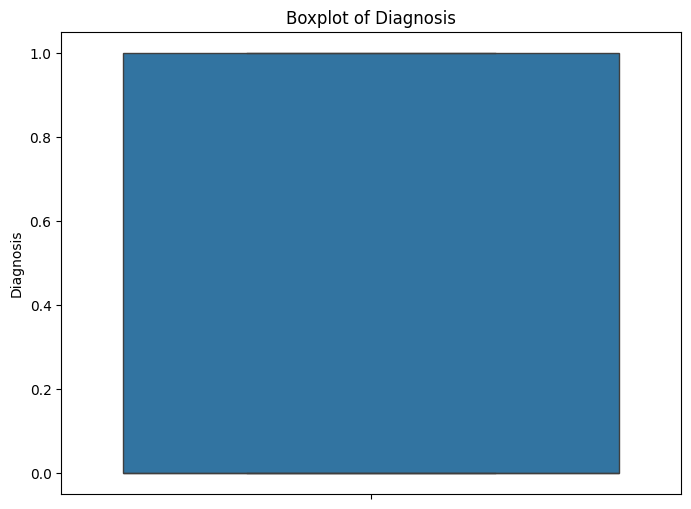

In [ ]:
# prompt: buatkan syntax untuk membuat boxplot dari peubah numerik df, buatkan tampilan boxplotnya vertikal

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame and contains numerical columns you want to plot.
# Replace 'numerical_column' with the actual name of the numerical column you want to visualize.

numerical_columns = df.select_dtypes(include=np.number).columns

for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[column], orient='v') # vertical boxplot
  plt.title(f'Boxplot of {column}')
  plt.ylabel(column)
  plt.show()


## Eksplorasi Peubah Kategorik

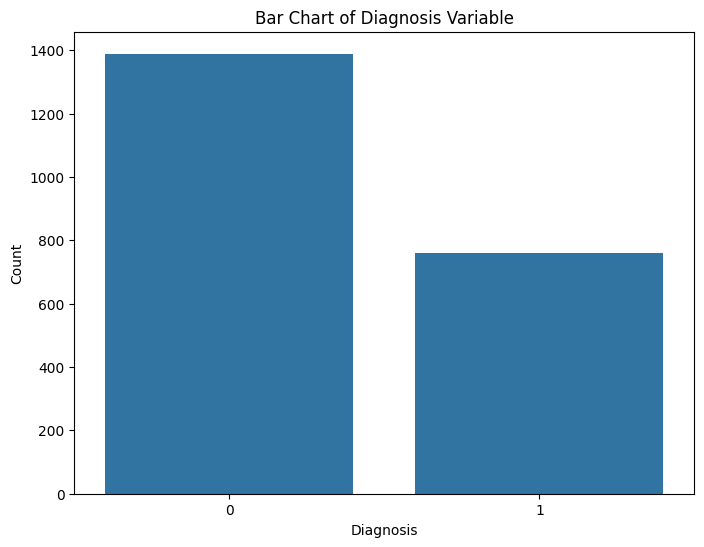

In [ ]:
# prompt: Buatkan barchart untuk peubah outcame dari df

import matplotlib.pyplot as plt
# Assuming 'Outcome' is the name of your target variable column.
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Bar Chart of Diagnosis Variable')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


Berdasarkan hasil diatas peubah outcame tidak balance

# Pembagian Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
#Declare X dan Y
X = df.drop(columns=['Diagnosis','DoctorInCharge'])
Y = df['Diagnosis']

In [ ]:
#Membagi data 80% training dan 20% testing

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1719, 32)
(430, 32)
(1719,)
(430,)


# Funtion Rotation **Forest**

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from scipy.stats import mode

class SimpleRotationForest:
    def __init__(self, n_estimators=5, n_subsets=3, random_state=None):
        self.n_estimators = n_estimators
        self.n_subsets = n_subsets
        self.random_state = random_state
        self.rng = np.random.RandomState(random_state)

        self.trees = []        # pohon keputusan
        self.R_matrices = []   # daftar Rᵢ (matriks rotasi penuh)

    # ---------------------------------------------------
    # 1) Membagi indeks fitur ke K subset bebas
    # ---------------------------------------------------
    def _split_features(self, n_features):
        idx = np.arange(n_features)
        self.rng.shuffle(idx)
        return np.array_split(idx, self.n_subsets)

    # ---------------------------------------------------
    # FIT
    # ---------------------------------------------------
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.trees.clear()
        self.R_matrices.clear()

        for _ in range(self.n_estimators):
            # ------------------------------
            # 1. Bootstrap instance keseluruhan
            # ------------------------------
            X_boot_all, y_boot_all = resample(
                X, y, random_state=self.rng.randint(0, 10000)
            )

            # Matrik rotasi kosong
            R_i = np.zeros((n_features, n_features))

            # ------------------------------
            # 2. Proses tiap subset fitur
            # ------------------------------
            for subset in self._split_features(n_features):
                subset = np.asarray(subset)
                # 2a Pilih satu kelas acak
                chosen_class = self.rng.choice(np.unique(y_boot_all))
                mask = y_boot_all == chosen_class

                # 2b Ambil data subset + bootstrap ulang
                X_subset = X_boot_all[mask][:, subset]
                X_subset_boot = resample(
                    X_subset, random_state=self.rng.randint(0, 10000)
                )

                # 2c PCA (tanpa reduksi komponen)
                pca = PCA()
                pca.fit(X_subset_boot)

                # 2d Simpan loading ke matriks rotasi global
                # pca.components_.T: (d_subset × d_subset)
                R_i[np.ix_(subset, subset)] = pca.components_.T

            # ------------------------------
            # 3. Susun Rᵃᵢ = Rᵢ dengan kolom asli (sudah ok)
            # ------------------------------

            # 4. Bangun pohon dengan data ter-rotasi
            X_rotated = X_boot_all @ R_i      # rotasi penuh
            tree = DecisionTreeClassifier(
                random_state=self.rng.randint(0, 10000))
            tree.fit(X_rotated, y_boot_all)

            # Simpan
            self.trees.append(tree)
            self.R_matrices.append(R_i)

    # ---------------------------------------------------
    # PREDICT
    # ---------------------------------------------------
    def predict(self, X):
        # Kumpulkan prediksi dari seluruh pohon
        preds = []
        for tree, R_i in zip(self.trees, self.R_matrices):
            X_rot = X @ R_i
            preds.append(tree.predict(X_rot))
        preds = np.array(preds).T   # (n_samples × n_trees)

        # Majority voting
        return mode(preds, axis=1).mode.ravel().astype(int)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# -------------------------------------------------------
# Wrapper sklearn‑compatible
# -------------------------------------------------------
class RotationForest(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=5, n_subsets=3, random_state=42):
        self.n_estimators = n_estimators
        self.n_subsets = n_subsets
        self.random_state = random_state
        self.model_ = None

    def fit(self, X, y):
        self.model_ = SimpleRotationForest(
            n_estimators=self.n_estimators,
            n_subsets=self.n_subsets,
            random_state=self.random_state
        )
        self.model_.fit(X, y)
        return self

    def predict(self, X):
        return self.model_.predict(X)

    def score(self, X, y):
        return self.model_.score(X, y)


# Pemodelan Tanpa Penanganan

## Pipeline Standarisasi

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
# Buat pipeline dengan MinMaxScaler + RotationForest
pipe = Pipeline([
    ('scaler', MinMaxScaler()),  # Gunakan MinMaxScaler
    ('clf', RotationForest())    # Gunakan RotationForest
])

## Tuning Hyperparameter

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.base import clone
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search parameter tuning (n = 1–20, k = 1,2,4) yang sesuai paper
param_grid = {
    'clf__n_estimators': list(range(1, 22)),
    'clf__n_subsets': [11,13,15]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, Y_train)

# Hasil terbaik
print("Best Params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)


NameError: name 'X_train' is not defined

In [ ]:
# Evaluasi pada train dan test
train_acc = accuracy_score(Y_train, grid.predict(X_train))
test_acc = accuracy_score(Y_test, grid.predict(X_test))

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")
print(f"Selisih      : {train_acc - test_acc:.4f}")

Akurasi Train: 0.9965
Akurasi Test : 0.9419
Selisih      : 0.0546


##Confusion Matrix Tanpa Balancing

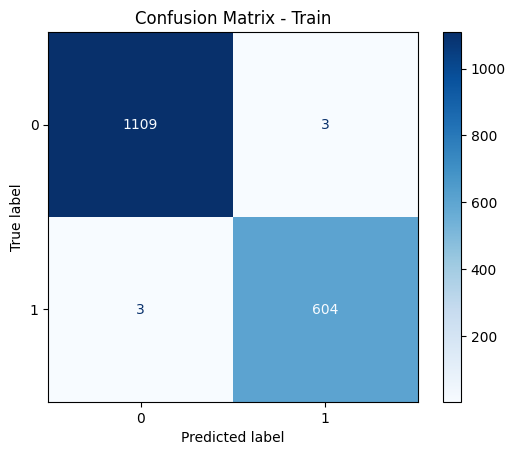

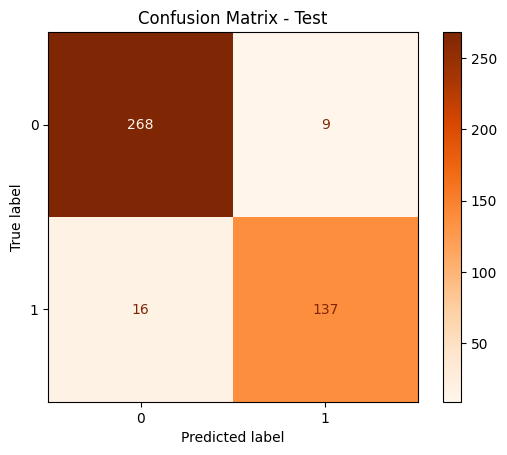

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

# Confusion matrix
train_cm = confusion_matrix(Y_train, y_pred_train)
test_cm = confusion_matrix(Y_test, y_pred_test)

# Gunakan label dari Y_train (asumsi semua kelas ada di Y_train)
labels = np.unique(Y_train)

# Plot Confusion Matrix - Train
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=labels)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Train")
plt.show()

# Plot Confusion Matrix - Test
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=labels)
disp_test.plot(cmap='Oranges')
plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)
import numpy as np

# Prediksi
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)

# Confusion matrix (untuk test set, bisa juga dilakukan untuk train)
cm_test = confusion_matrix(Y_test, y_pred_test)

# Ekstrak TN, FP, FN, TP
# Pastikan urutan label adalah [negatif, positif]
tn, fp, fn, tp = cm_test.ravel()

# Hitung metrik
accuracy = accuracy_score(Y_test, y_pred_test)
sensitivity = recall_score(Y_test, y_pred_test)  # Recall = Sensitivitas
specificity = tn / (tn + fp)
f1 = f1_score(Y_test, y_pred_test)

# Tampilkan hasil
print(f"Akurasi      : {accuracy:.4f}")
print(f"Sensitivitas : {sensitivity:.4f}")
print(f"Spesifisitas : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")

Akurasi      : 0.9419
Sensitivitas : 0.8954
Spesifisitas : 0.9675
F1 Score     : 0.9164


## Feature Important

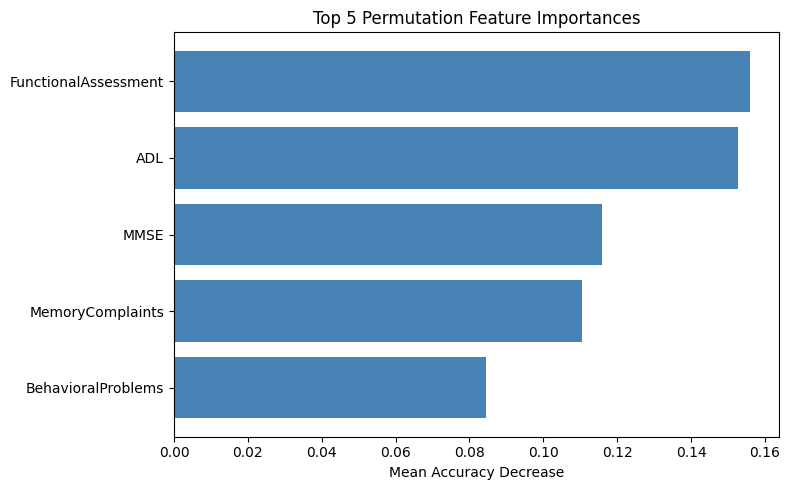

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Hitung permutation importance
result = permutation_importance(
    grid.best_estimator_, X_test, Y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Ambil indeks top 5 fitur terpenting (urutan dari besar ke kecil)
sorted_idx = result.importances_mean.argsort()[::-1][:5]

# Ambil nama fitur (ganti sesuai kebutuhan)
feature_names = X.columns if hasattr(X, 'columns') else [f'F{i}' for i in range(X.shape[1])]
top_features = [feature_names[i] for i in sorted_idx]
top_importances = result.importances_mean[sorted_idx]

# Plot horizontal bar chart tanpa garis hitam (tanpa error bars)
plt.figure(figsize=(8, 5))
plt.barh(top_features, top_importances, color='steelblue', edgecolor='none')
plt.xlabel("Mean Accuracy Decrease")
plt.title("Top 5 Permutation Feature Importances")
plt.gca().invert_yaxis()  # Penting agar fitur terpenting di atas
plt.tight_layout()
plt.show()

# Pemodelan SMOTE

##SMOTE data Train

In [ ]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan hanya pada data latih
X_train_res_smote, Y_train_res_smote= smote.fit_resample(X_train, Y_train)

## Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': list(range(1, 22)),
    'clf__n_subsets': [11,13,15]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_res_smote, Y_train_res_smote)

# Hasil terbaik
print("Best Params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)

Best Params: {'clf__n_estimators': 20, 'clf__n_subsets': 11}
CV accuracy: 0.8740206498633466


In [ ]:
# Evaluasi pada train dan test
train_acc = accuracy_score(Y_train_res_smote, grid.predict(X_train_res_smote))
test_acc = accuracy_score(Y_test, grid.predict(X_test))

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")
print(f"Selisih      : {train_acc - test_acc:.4f}")

Akurasi Train: 0.9991
Akurasi Test : 0.9163
Selisih      : 0.0828



##Confusion Matrix SMOTE


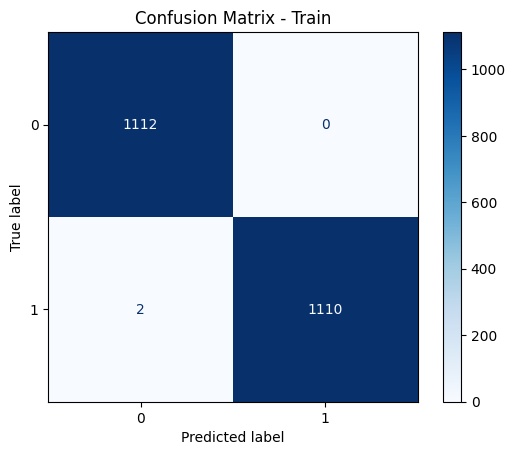

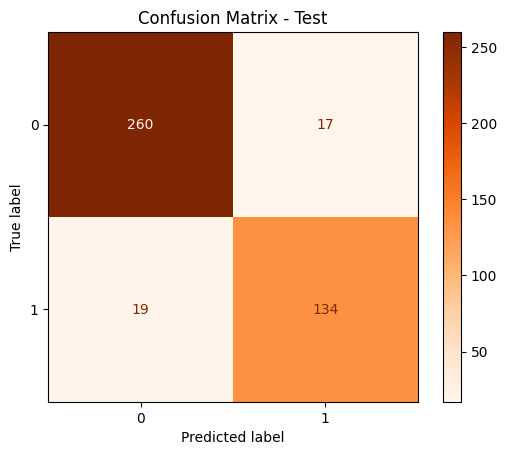

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_train = grid.predict(X_train_res_smote)
y_pred_test = grid.predict(X_test)

# Confusion matrix
train_cm = confusion_matrix(Y_train_res_smote, y_pred_train)
test_cm = confusion_matrix(Y_test, y_pred_test)

# Gunakan label dari Y_train (asumsi semua kelas ada di Y_train)
labels = np.unique(Y_train_res_smote)

# Plot Confusion Matrix - Train
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=labels)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Train")
plt.show()

# Plot Confusion Matrix - Test
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=labels)
disp_test.plot(cmap='Oranges')
plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)
import numpy as np

# Prediksi
y_pred_train = grid.predict(X_train_res_smote)
y_pred_test = grid.predict(X_test)

# Confusion matrix (untuk test set, bisa juga dilakukan untuk train)
cm_test = confusion_matrix(Y_test, y_pred_test)

# Ekstrak TN, FP, FN, TP
# Pastikan urutan label adalah [negatif, positif]
tn, fp, fn, tp = cm_test.ravel()

# Hitung metrik untuk data train
accuracy_train = accuracy_score(Y_train_res_smote, y_pred_train)
sensitivity_train = recall_score(Y_train_res_smote, y_pred_train)  # Recall = Sensitivitas
specificity_train = tn / (tn + fp)
f1_train = f1_score(Y_train_res_smote, y_pred_train)

# Tampilkan hasil metrik untuk data train
print(f"[Train] Akurasi      : {accuracy_train:.4f}")
print(f"[Train] Sensitivitas : {sensitivity_train:.4f}")
print(f"[Train] Spesifisitas : {specificity_train:.4f}")
print(f"[Train] F1 Score     : {f1_train:.4f}")

# Hitung metrik
accuracy = accuracy_score(Y_test, y_pred_test)
sensitivity = recall_score(Y_test, y_pred_test)  # Recall = Sensitivitas
specificity = tn / (tn + fp)
f1 = f1_score(Y_test, y_pred_test)

# Tampilkan hasil
print(f"Akurasi      : {accuracy:.4f}")
print(f"Sensitivitas : {sensitivity:.4f}")
print(f"Spesifisitas : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")

[Train] Akurasi      : 0.9991
[Train] Sensitivitas : 0.9982
[Train] Spesifisitas : 0.9386
[Train] F1 Score     : 0.9991
Akurasi      : 0.9163
Sensitivitas : 0.8758
Spesifisitas : 0.9386
F1 Score     : 0.8816


## Feature Important

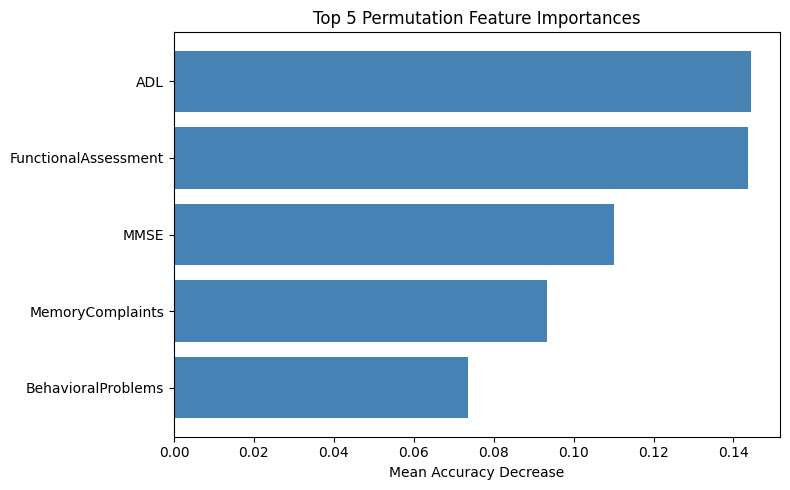

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Hitung permutation importance
result = permutation_importance(
    grid.best_estimator_, X_test, Y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Ambil indeks top 5 fitur terpenting (urutan dari besar ke kecil)
sorted_idx = result.importances_mean.argsort()[::-1][:5]

# Ambil nama fitur (ganti sesuai kebutuhan)
feature_names = X.columns if hasattr(X, 'columns') else [f'F{i}' for i in range(X.shape[1])]
top_features = [feature_names[i] for i in sorted_idx]
top_importances = result.importances_mean[sorted_idx]

# Plot horizontal bar chart tanpa garis hitam (tanpa error bars)
plt.figure(figsize=(8, 5))
plt.barh(top_features, top_importances, color='steelblue', edgecolor='none')
plt.xlabel("Mean Accuracy Decrease")
plt.title("Top 5 Permutation Feature Importances")
plt.gca().invert_yaxis()  # Penting agar fitur terpenting di atas
plt.tight_layout()
plt.show()

# Pemodelan Oversampling

##Oversampling data train

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Terapkan pada data latih
X_train_res_over, Y_train_res_over = ros.fit_resample(X_train, Y_train)


## Tuning Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Grid search parameter tuning
param_grid = {
    'clf__n_estimators': list(range(1, 22)),
    'clf__n_subsets': [11,13,15]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_res_over, Y_train_res_over)

# Hasil terbaik
print("Best Params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)

Best Params: {'clf__n_estimators': 21, 'clf__n_subsets': 15}
CV accuracy: 0.9671879744913452


In [ ]:
# Evaluasi pada train dan test
train_acc = accuracy_score(Y_train_res_over, grid.predict(X_train_res_over))
test_acc = accuracy_score(Y_test, grid.predict(X_test))

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")
print(f"Selisih      : {train_acc - test_acc:.4f}")

Akurasi Train: 0.9982
Akurasi Test : 0.9419
Selisih      : 0.0563


##Confusion Matrix Oversampling

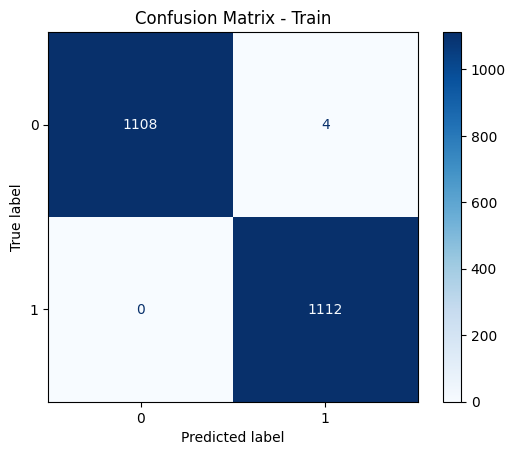

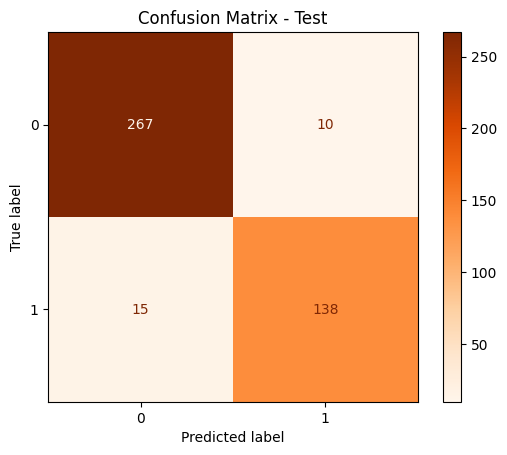

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_train = grid.predict(X_train_res_over)
y_pred_test = grid.predict(X_test)

# Confusion matrix
train_cm = confusion_matrix(Y_train_res_over, y_pred_train)
test_cm = confusion_matrix(Y_test, y_pred_test)

# Gunakan label dari Y_train (asumsi semua kelas ada di Y_train)
labels = np.unique(Y_train)

# Plot Confusion Matrix - Train
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=labels)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Train")
plt.show()

# Plot Confusion Matrix - Test
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=labels)
disp_test.plot(cmap='Oranges')
plt.title("Confusion Matrix - Test")
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)
import numpy as np

# Prediksi
y_pred_train = grid.predict(X_train_res_over)
y_pred_test = grid.predict(X_test)

# Confusion matrix (untuk test set, bisa juga dilakukan untuk train)
cm_test = confusion_matrix(Y_test, y_pred_test)

# Ekstrak TN, FP, FN, TP
# Pastikan urutan label adalah [negatif, positif]
tn, fp, fn, tp = cm_test.ravel()

# Hitung metrik untuk data train
accuracy_train = accuracy_score(Y_train_res_over, y_pred_train)
sensitivity_train = recall_score(Y_train_res_over, y_pred_train)  # Recall = Sensitivitas
specificity_train = tn / (tn + fp)
f1_train = f1_score(Y_train_res_over, y_pred_train)

# Tampilkan hasil metrik untuk data train
print(f"[Train] Akurasi      : {accuracy_train:.4f}")
print(f"[Train] Sensitivitas : {sensitivity_train:.4f}")
print(f"[Train] Spesifisitas : {specificity_train:.4f}")
print(f"[Train] F1 Score     : {f1_train:.4f}")

# Hitung metrik
accuracy = accuracy_score(Y_test, y_pred_test)
sensitivity = recall_score(Y_test, y_pred_test)  # Recall = Sensitivitas
specificity = tn / (tn + fp)
f1 = f1_score(Y_test, y_pred_test)

# Tampilkan hasil
print(f"Akurasi      : {accuracy:.4f}")
print(f"Sensitivitas : {sensitivity:.4f}")
print(f"Spesifisitas : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")


[Train] Akurasi      : 0.9982
[Train] Sensitivitas : 1.0000
[Train] Spesifisitas : 0.9639
[Train] F1 Score     : 0.9982
Akurasi      : 0.9419
Sensitivitas : 0.9020
Spesifisitas : 0.9639
F1 Score     : 0.9169


## Feature Important

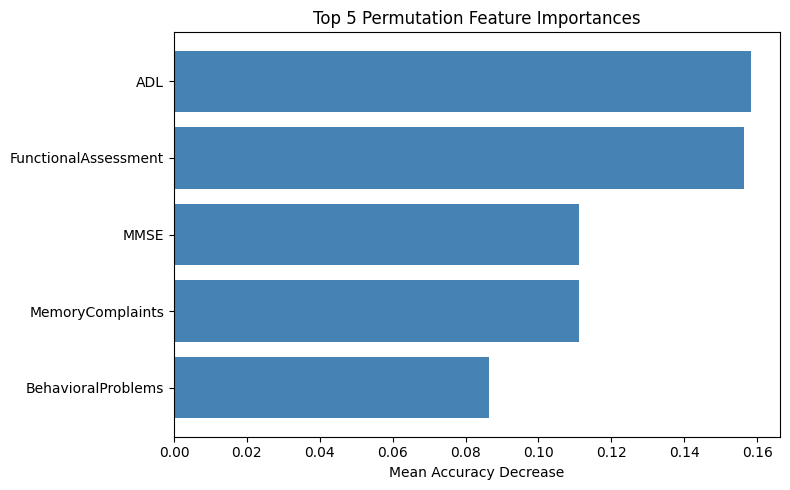

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Hitung permutation importance
result = permutation_importance(
    grid.best_estimator_, X_test, Y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Ambil indeks top 5 fitur terpenting (urutan dari besar ke kecil)
sorted_idx = result.importances_mean.argsort()[::-1][:5]

# Ambil nama fitur (ganti sesuai kebutuhan)
feature_names = X.columns if hasattr(X, 'columns') else [f'F{i}' for i in range(X.shape[1])]
top_features = [feature_names[i] for i in sorted_idx]
top_importances = result.importances_mean[sorted_idx]

# Plot horizontal bar chart tanpa garis hitam (tanpa error bars)
plt.figure(figsize=(8, 5))
plt.barh(top_features, top_importances, color='steelblue', edgecolor='none')
plt.xlabel("Mean Accuracy Decrease")
plt.title("Top 5 Permutation Feature Importances")
plt.gca().invert_yaxis()  # Penting agar fitur terpenting di atas
plt.tight_layout()
plt.show()

# Pemodelan Undersampling

##Undersampling Data Train

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Inisialisasi undersampler
rus = RandomUnderSampler(random_state=42)

# Terapkan pada data latih
X_train_res_under, Y_train_res_under= rus.fit_resample(X_train, Y_train)

##Tuning Hyperparameter


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search parameter tuning (n = 1–20, k = 1,2,4) yang sesuai paper
param_grid = {
    'clf__n_estimators': list(range(1, 22)),  # n: 1 to 20
    'clf__n_subsets': [11,13,15]              # k: 1, 2, 4
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_res_under, Y_train_res_under)

# Hasil terbaik
print("Best Params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)

Best Params: {'clf__n_estimators': 20, 'clf__n_subsets': 15}
CV accuracy: 0.8945447743427541


In [ ]:
# Evaluasi pada train dan test
train_acc = accuracy_score(Y_train_res_under, grid.predict(X_train_res_under))
test_acc = accuracy_score(Y_test, grid.predict(X_test))

print(f"Akurasi Train: {train_acc:.4f}")
print(f"Akurasi Test : {test_acc:.4f}")
print(f"Selisih      : {train_acc - test_acc:.4f}")

Akurasi Train: 0.9967
Akurasi Test : 0.9442
Selisih      : 0.0525


##Confusion Matrix Undersampling


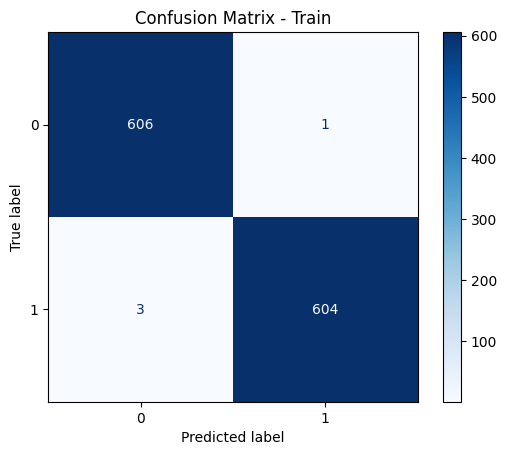

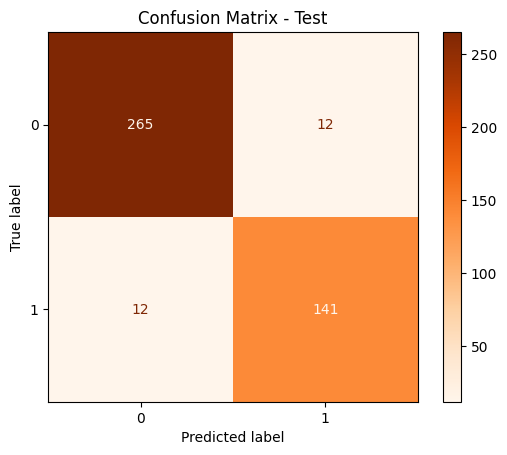

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_train = grid.predict(X_train_res_under)
y_pred_test = grid.predict(X_test)

# Confusion matrix
train_cm = confusion_matrix(Y_train_res_under, y_pred_train)
test_cm = confusion_matrix(Y_test, y_pred_test)

# Gunakan label dari Y_train (asumsi semua kelas ada di Y_train)
labels = np.unique(Y_train)

# Plot Confusion Matrix - Train
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=labels)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Train")
plt.show()

# Plot Confusion Matrix - Test
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=labels)
disp_test.plot(cmap='Oranges')
plt.title("Confusion Matrix - Test")
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)
import numpy as np

# Prediksi
y_pred_train = grid.predict(X_train_res_under)
y_pred_test = grid.predict(X_test)

# Confusion matrix (untuk test set, bisa juga dilakukan untuk train)
cm_test = confusion_matrix(Y_test, y_pred_test)

# Ekstrak TN, FP, FN, TP
# Pastikan urutan label adalah [negatif, positif]
tn, fp, fn, tp = cm_test.ravel()

# Hitung metrik untuk data train
accuracy_train = accuracy_score(Y_train_res_under, y_pred_train)
sensitivity_train = recall_score(Y_train_res_under, y_pred_train)  # Recall = Sensitivitas
specificity_train = tn / (tn + fp)
f1_train = f1_score(Y_train_res_under, y_pred_train)

# Tampilkan hasil metrik untuk data train
print(f"[Train] Akurasi      : {accuracy_train:.4f}")
print(f"[Train] Sensitivitas : {sensitivity_train:.4f}")
print(f"[Train] Spesifisitas : {specificity_train:.4f}")
print(f"[Train] F1 Score     : {f1_train:.4f}")


# Hitung metrik
accuracy = accuracy_score(Y_test, y_pred_test)
sensitivity = recall_score(Y_test, y_pred_test)  # Recall = Sensitivitas
specificity = tn / (tn + fp)
f1 = f1_score(Y_test, y_pred_test)

# Tampilkan hasil
print(f"Akurasi      : {accuracy:.4f}")
print(f"Sensitivitas : {sensitivity:.4f}")
print(f"Spesifisitas : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")


[Train] Akurasi      : 0.9967
[Train] Sensitivitas : 0.9951
[Train] Spesifisitas : 0.9567
[Train] F1 Score     : 0.9967
Akurasi      : 0.9442
Sensitivitas : 0.9216
Spesifisitas : 0.9567
F1 Score     : 0.9216


## Feature Important

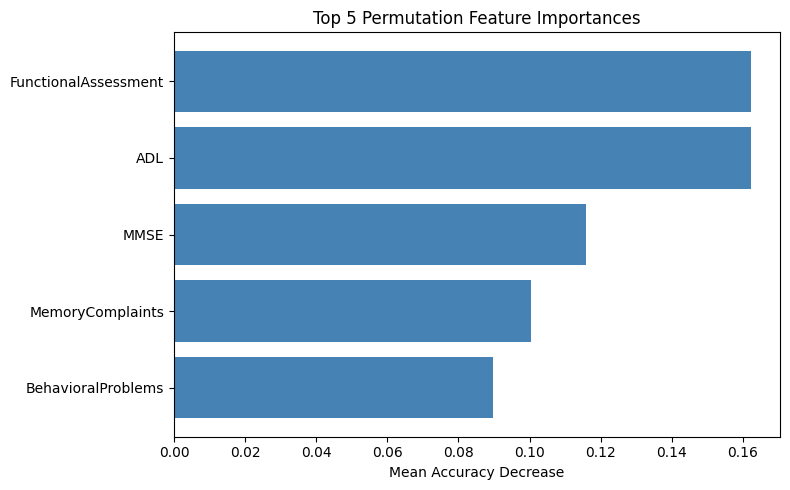

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Hitung permutation importance
result = permutation_importance(
    grid.best_estimator_, X_test, Y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

# Ambil indeks top 5 fitur terpenting (urutan dari besar ke kecil)
sorted_idx = result.importances_mean.argsort()[::-1][:5]

# Ambil nama fitur (ganti sesuai kebutuhan)
feature_names = X.columns if hasattr(X, 'columns') else [f'F{i}' for i in range(X.shape[1])]
top_features = [feature_names[i] for i in sorted_idx]
top_importances = result.importances_mean[sorted_idx]

# Plot horizontal bar chart tanpa garis hitam (tanpa error bars)
plt.figure(figsize=(8, 5))
plt.barh(top_features, top_importances, color='steelblue', edgecolor='none')
plt.xlabel("Mean Accuracy Decrease")
plt.title("Top 5 Permutation Feature Importances")
plt.gca().invert_yaxis()  # Penting agar fitur terpenting di atas
plt.tight_layout()
plt.show()

#SHAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/valida

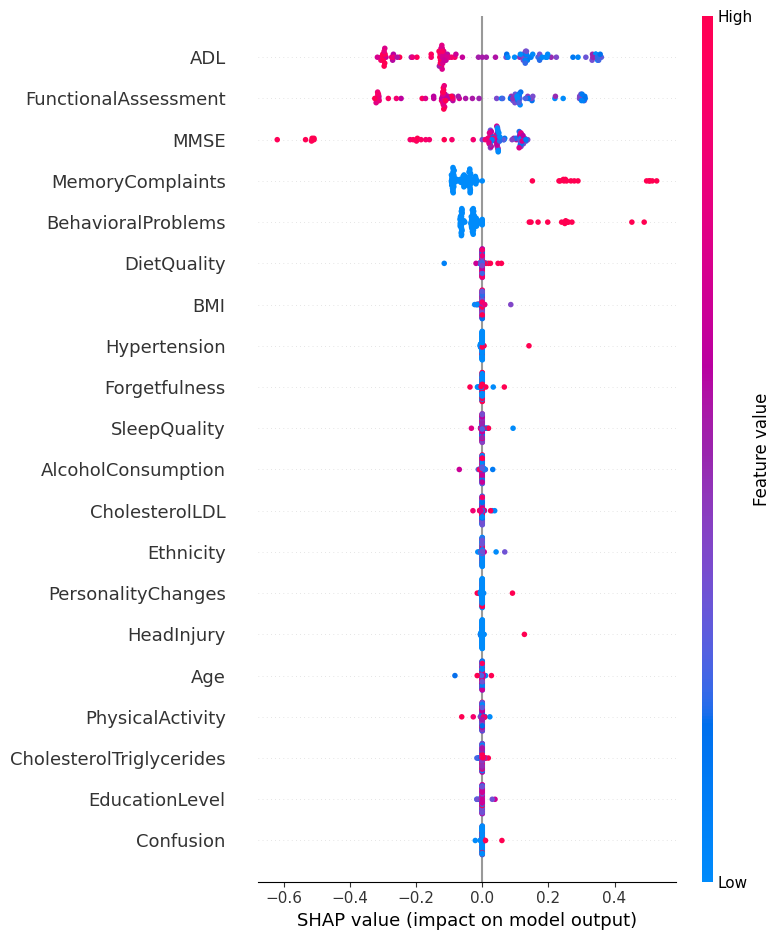

In [ ]:
import shap
import pandas as pd

# Pastikan X_test adalah DataFrame
X_test = pd.DataFrame(X_test, columns=X.columns)

# Ambil sebagian data untuk efisiensi
X_sample = X_test.sample(100, random_state=42)

# Ambil model terbaik
best_model = grid.best_estimator_

# Gunakan lambda untuk menghindari error .feature_names_in_
explainer = shap.KernelExplainer(lambda x: best_model.predict(x), X_sample)

# Hitung SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot SHAP summary
shap.summary_plot(shap_values, X_sample)

In [ ]:
import numpy as np

# Hitung koefisien SHAP global (mean absolute SHAP value per fitur)
shap_values_array = np.array(shap_values)  # pastikan dalam array
mean_abs_shap = np.abs(shap_values_array).mean(axis=0)

# Buat DataFrame agar rapi
shap_coef_df = pd.DataFrame({
    'Fitur': X_sample.columns,
    'Koefisien SHAP': mean_abs_shap
})

# Urutkan dari yang paling penting
shap_coef_df = shap_coef_df.sort_values(by='Koefisien SHAP', ascending=False)

# Tampilkan
print(shap_coef_df)


                        Fitur  Koefisien SHAP
26                        ADL        0.186519
23       FunctionalAssessment        0.164055
22                       MMSE        0.108771
24           MemoryComplaints        0.099466
25         BehavioralProblems        0.066298
8                 DietQuality        0.003713
4                         BMI        0.002714
15               Hypertension        0.002468
31              Forgetfulness        0.002387
9                SleepQuality        0.002347
6          AlcoholConsumption        0.002133
19             CholesterolLDL        0.002122
2                   Ethnicity        0.002068
29         PersonalityChanges        0.002031
14                 HeadInjury        0.001873
0                         Age        0.001768
7            PhysicalActivity        0.001715
21   CholesterolTriglycerides        0.001589
3              EducationLevel        0.001474
27                  Confusion        0.001430
10    FamilyHistoryAlzheimers     